# Prediction Using Decision Tree Algorithm

# Import important libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the Dataset

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
#top five datapoints
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Bottom five datapoints
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df.drop('Id', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Visulization

In [15]:
species_count = df['Species'].value_counts()
labels = species_count.index.tolist()
count = species_count.values.tolist()
species_count.to_frame()

,Species
Iris-virginica,50
Iris-versicolor,50
Iris-setosa,50


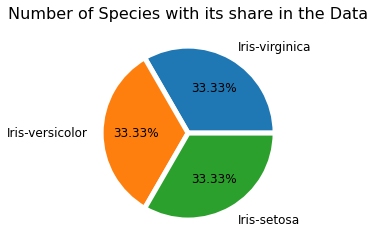

In [16]:
plt.pie(count, labels = labels, labeldistance = 1.15, wedgeprops = {'linewidth' : 5, 'edgecolor' : 'white'}, textprops = {'fontsize' : 12}, autopct = "%1.2f%%")
plt.title("Number of Species with its share in the Data", fontsize = 16)
plt.show()

<Figure size 1080x432 with 0 Axes>

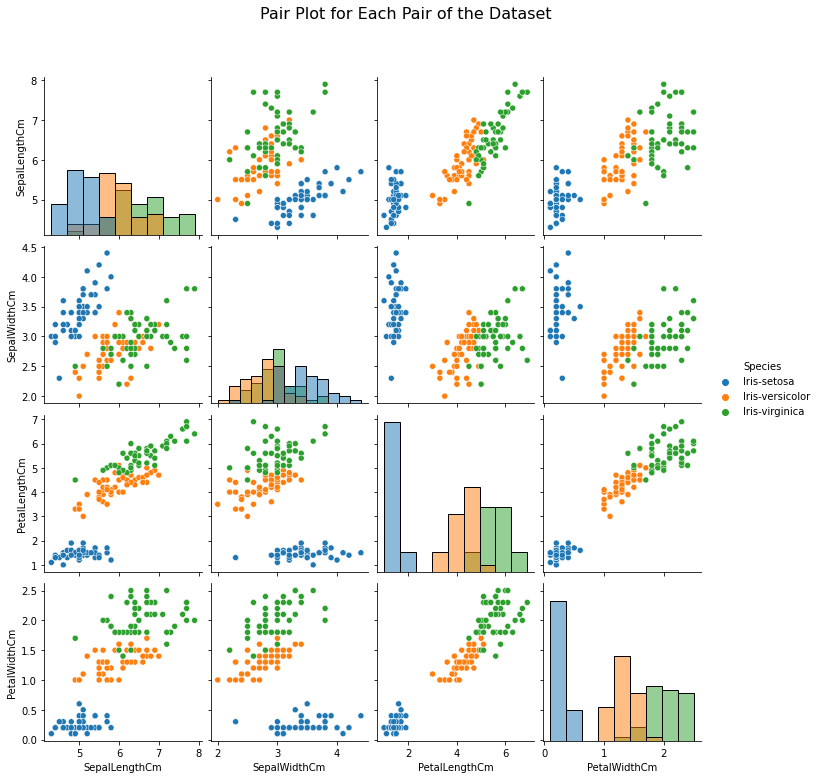

In [17]:
fig =  plt.figure(figsize = (15,6))
visual = sns.pairplot(df, hue =  'Species', diag_kind = 'hist')
visual.fig.suptitle("Pair Plot for Each Pair of the Dataset", y = 1.08, fontsize =  16)
plt.show()

# Checking correlation between features

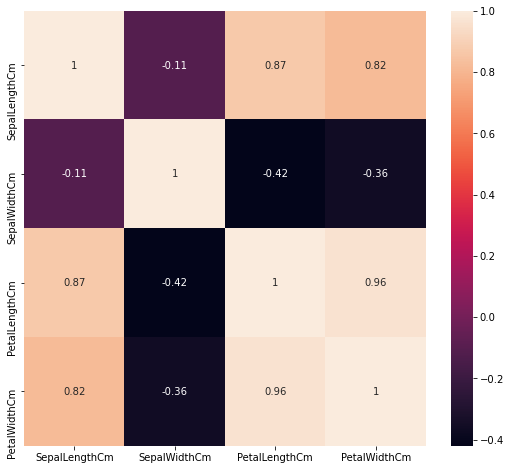

In [18]:
plt.figure(figsize=(9,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Exploratory data analysis 
# Handling the missing values

In [9]:
#Checking the Null Values
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is no missing values in dataset

#  Handling Outliers

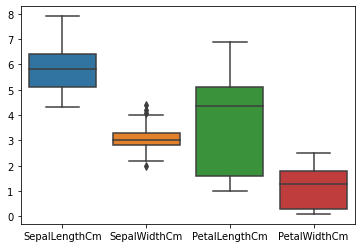

In [10]:
#removing outliers
sns.boxplot(data=df)
plt.show()

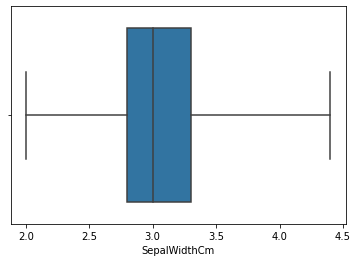

In [11]:
#removing the outliers of feature SepalWidthCm
sns.boxplot(data=df, x="SepalWidthCm",whis=2.5)
plt.show()

# Handling skewness

In [12]:
from scipy.stats import skew

SepalLengthCm = 0.3117530585022963


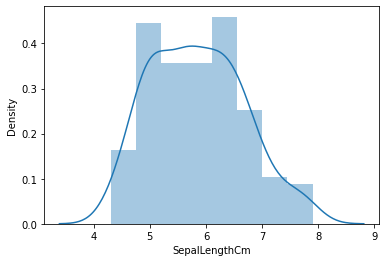

******************************************************
SepalWidthCm = 0.330702812773315


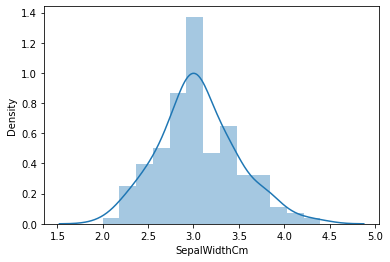

******************************************************
PetalLengthCm = -0.2717119501716388


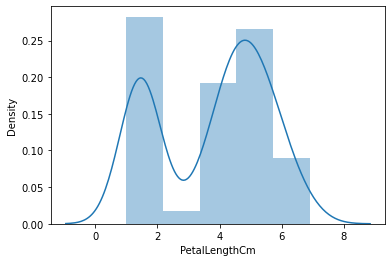

******************************************************
PetalWidthCm = -0.10394366626751729


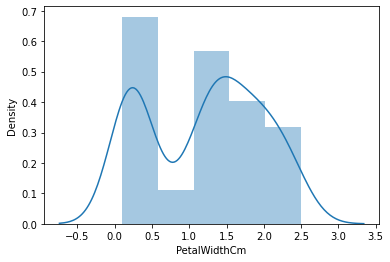

******************************************************
******************************************************


In [13]:
for col in df:
  try:
    print(col,'=',skew(df[col]))
    sns.distplot(df[col])
    plt.show()
  except:
    pass
  finally:
    print("******************************************************")

all features has skew value between -0.5 and 0.5

In [19]:
X = df.iloc[:, 0:4]
X = X.values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
Y =  (df.iloc[:, 4])
Y = Y.values
Y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std =  StandardScaler()
X = std.fit_transform(X)
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# Splitting into the Train & Test Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size  = 0.3, random_state  =  1)
print("Size of Training Set")
print("X =", x_train.shape)
print("Y =", y_train.shape)
print()
print("Size of Test Set")
print("X =", x_test.shape)
print("Y =", y_test.shape)
print()

Size of Training Set
X = (105, 4)
Y = (105,)

Size of Test Set
X = (45, 4)
Y = (45,)



# Model Building

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
iris_tree =  DecisionTreeClassifier(criterion =  "entropy", max_depth =  4)
iris_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
y_pred = iris_tree.predict(x_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

# Model Evaluation

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy of the Decision Tree Algorithm is : ", str(acc_score*100)+ "%")

The accuracy of the Decision Tree Algorithm is :  95.55555555555556%


In [30]:
iris_cm = confusion_matrix(y_test, y_pred)
species = df['Species'].unique().tolist()
iris_cm = pd.DataFrame(iris_cm, index = species, columns = species)
iris_cm

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,14,0,0
Iris-versicolor,0,17,1
Iris-virginica,0,1,12


In [31]:
from sklearn.tree import plot_tree

In [32]:
columns = df.columns.tolist()
print(columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


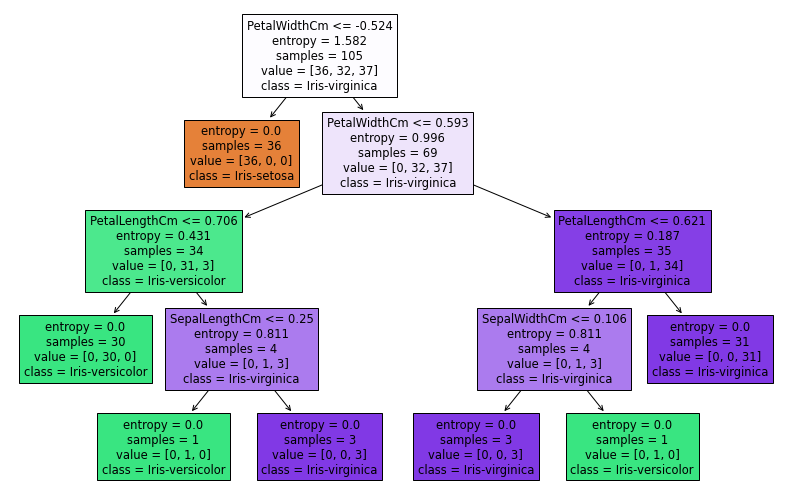

In [33]:
fig = plt.figure(figsize=(14,9))
tree_visual = plot_tree(iris_tree, feature_names = columns,  class_names = species, filled = True)